# Here we look at 2 implementations of KMeans
The first uses Pandas DataFrame
The second uses Numpy Arrays

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [19]:
# https://bit.ly/3IAI2hJ 

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

column_names = ["X","Y"]
df = pd.DataFrame(data=X, columns=column_names)


def get_random_centroids(data, k = 3):
    
    #return random samples from the dataset
    cent = (data.sample(n = k))
    return cent

get_random_centroids(df, 2)
df.head

<bound method NDFrame.head of             X         Y
0    2.406157  4.870475
1    2.580767  0.828599
2    1.062696  5.176351
3    2.548219  0.900839
4    1.390161  5.084895
..        ...       ...
295  2.614377  1.101643
296  0.584825  4.069215
297  1.187347  1.377842
298  1.623505  0.409868
299  1.288909  3.958315

[300 rows x 2 columns]>

In [12]:
def k_means_fit(X,centroids, n = 5):
    #get a copy of the original data
    X_data = X
    print(X.shape)
    
    diff = 1
    j=0

    while(diff!=0):

        #creating a copy of the original dataframe
        i=1

        #iterate over each centroid point 
        for index1,row_c in centroids.iterrows():
            ED=[]

            #iterate over each data point
            for index2,row_d in X_data.iterrows():

                #calculate distance between current point and centroid
                d1=(row_c["X"]-row_d["X"])**2
                d2=(row_c["Y"]-row_d["Y"])**2
                d=np.sqrt(d1+d2)

                #append distance in a list 'ED'
                ED.append(d)

            #append distace for a centroid in original data frame
            X[i]=ED
            i=i+1

        C=[]
        for index,row in X.iterrows():

            #get distance from centroid of current data point
            min_dist=row[1]
            pos=1

            #loop to locate the closest centroid to current point
            for i in range(n):

                #if current distance is greater than that of other centroids
                if row[i+1] < min_dist:

                    #the smaller distanc becomes the minimum distance 
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos)

        #assigning the closest cluster to each data point
        X["Cluster"]=C

        #grouping each cluster by their mean value to create new centroids
        centroids_new = X.groupby(["Cluster"]).mean()[["X","Y"]]
        if j == 0:
            diff=1
            j=j+1

        else:
            #check if there is a difference between old and new centroids
            diff = (centroids_new['X'] - centroids['X']).sum() + (centroids_new['Y'] - centroids['Y']).sum()
            print(diff.sum())

        centroids = X.groupby(["Cluster"]).mean()[["X","Y"]]
        
    return X, centroids

            X         Y
200  1.413724  4.381177
226  2.963264  1.229543
213  0.736601  4.525821
29   0.192354  5.298666
(300, 2)
-0.030942596788421428
-0.04065796096620905
-0.07543330807492032
-0.024629810551182407
-0.021488049097389827
-0.018859577748342904
0.012244837367356098
0.0


Text(0, 0.5, 'Y')

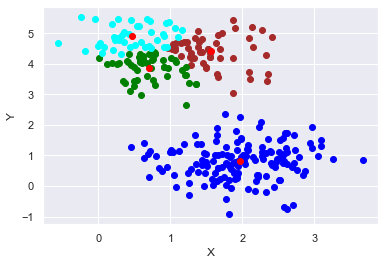

In [13]:
# This is the main Driver for calculating KMeans
centroids = get_random_centroids(df, k = 4)
print(centroids)

clustered, cent = k_means_fit(df,centroids, n= 4)
#setting color values for our 
color=['brown','blue','green','cyan']

#plot data
for k in range(len(color)):
    cluster=clustered[clustered["Cluster"]==k+1]
    plt.scatter(cluster["X"],cluster["Y"],c=color[k])
    
#plot centroids    
plt.scatter(cent["X"],cent["Y"],c='red')
plt.xlabel('X')
plt.ylabel('Y')

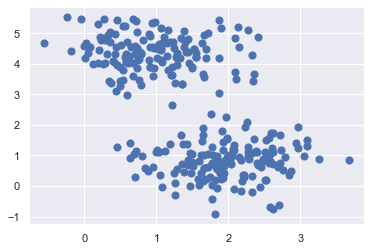

In [14]:
# Create Clusters of points
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

[0.21397908 4.88542535]
[2.35448169 1.52644695]
[2.18335555 0.17251947]
targets AAA: [[0.21397908 4.88542535]
 [2.35448169 1.52644695]
 [2.18335555 0.17251947]]
targetID shape: (300, 1)
<class 'numpy.ndarray'>
targets: [2.40615694 2.46801438 2.10731605]
targetID shape: (300, 1)
<class 'numpy.ndarray'>
targets: [2.40615694 2.54860214 2.00376997]
targetID shape: (300, 1)
<class 'numpy.ndarray'>
targets: [2.40615694 2.51338647 2.22808405]
targetID shape: (300, 1)
<class 'numpy.ndarray'>
targets: [2.40615694 2.50778556 2.29583912]
targetID shape: (300, 1)
<class 'numpy.ndarray'>
targets: [2.40615694 2.50574453 2.32776857]
targetID shape: (300, 1)
<class 'numpy.ndarray'>
targets: [2.40615694 2.50462136 2.34120318]
targetID shape: (300, 1)
<class 'numpy.ndarray'>
targets: [2.40615694 2.50425258 2.34568138]
targetID shape: (300, 1)
<class 'numpy.ndarray'>
targets: [2.40615694 2.50425258 2.34568138]
targetID shape: (300, 1)
<class 'numpy.ndarray'>
targets: [2.40615694 2.50425258 2.34568138]
ta

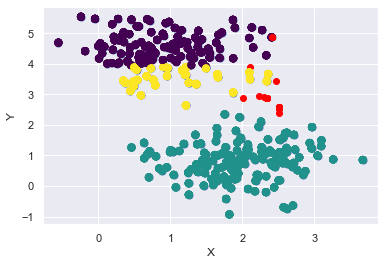

In [51]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling
X, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

# This is another implementation using Numpy Arrays


def createClusters(targets, points):
    # assign point to target
    targetID = np.zeros((len(points), 1))
    for index, point in enumerate(points):
        targetID[index] = getClosest(targets, point)
    return targetID  # this maps points to target

# assign point to closest target


def getClosest(targets, point):
    closest = 0
    dmin = 99999
    for index, target in enumerate(targets):
        d = distance(target, point)
        if d < dmin:
            closest = index
            dmin = d
    return closest


def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])*(p1[0] - p2[0]) +
                   (p1[1] - p2[1])*(p1[1] - p2[1]))


def getRandomPoint(X):
    i = np.random.randint(0, len(X)-1)
    return np.array(X[i])


def updateTargets(X, targetID, targets):
    newTargets = []
    points = []
    it = np.nditer(targets, flags=['f_index'])
    xt = np.nditer(X, flags=['f_index'])
    print(f'targetID shape: {targetID.shape}')
    rowsTarget = targets.shape[0]
    rowsX = X.shape[0]
    for i in range(0, rowsTarget):
        for j in range(0, rowsX):

            clusterID = int(targetID[j])
            if clusterID == i:
                points.append(X[i])
        newTargets.append(np.array(points).mean(0))
    return np.array(newTargets)


# get k random targets
k = 3
targets = np.zeros((k, 2))
for i in range(k):
    centroid = getRandomPoint(X)
    print(centroid)
    targets[i] = np.array(centroid)

print(f'targets AAA: {targets}')
# loop until targets don't move
for iter in range(10):
    targetID = createClusters(targets, X)
    plt.scatter(X[:, 0], X[:, 1], c=targetID, s=50, cmap='viridis')
    targets = updateTargets(X, targetID, targets)

    # plot centroids
    print(type(targets))
    centx = targets[:, 0]
    centy = targets[:, 1]
    print(f'targets: {centx}')
    plt.scatter(centx, centy, c='red')
    plt.xlabel('X')
    plt.ylabel('Y')


In [28]:
a = np.ones((3,2))
print(a)
d = np.zeros((3,1))

a = np.hstack((a,d))
print(a)
print(a[:,2])

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]]
[0. 0. 0.]
